# Regression Workbook 

The purpose of this problem set is to put your regression skills to the test. As a GA student of data science, you have covered a number of sklearn regression techniques, so now is your chance to apply them. We'll be using the Boston Housing Dataset. Just kidding. I know you hate that one. 

We'll be exploring the relationships between sugar, economics, and teeth. You are given a dataset containing sugar consuption, healthcare spending, per capita GDP, literacy rate and the number of bad teeth per child across several hundred countries. What do you think? If you get richer, do your teeth get worse from more sugary foods, or better with health care assistance? Does education improve health, or drive excess? 

<img src='https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/brush.gif' width='150'>

You'll be implementing some of the techniques you've learned in class with hypothesis testing, exploratory analysis, and regression. A few questions to consider: 
 
    1) What questions are relevant to ask? How do explore these your initial analysis?
    2) How can you optimize on the default regression techniques? 
    3) How can you effectively visualize and explain the relationships?
    
I've provided some imports and starter code to get you going.

If you get stuck, remember the options you have. Talk to your neighbors, check out StackOverflow and blogs (I recommend Googling your question with the term blog.yhat), and run '?' on functions for docstrings. 

In [1]:
# ex. 
max?

# Exploratory Analysis 

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [12]:
df = pd.read_csv("data/dental_economics.csv")

In [13]:
#TO DO: 
# perform exploratory analysis. Clean the data as necessary and use correlation to find relevant features. 
# check the distributions of the data. Write a sentence about the distribution. 

In [14]:
df.head()

,Country,badteeth,literacy_avg,GDP_avg,sugar_avg,health_avg
0,Saudi Arabia,5.9,80.046624,10460.159370,63.511591,282.826662
1,Guatemala,5.2,69.723543,1487.355625,97.758182,44.111681
2,Mauritius,4.9,84.339633,3074.829677,120.550000,100.265111
3,Brunei,4.8,88.439129,20991.519650,108.220000,549.706067
4,Bosnia and Herzegovina,4.8,97.332859,1590.190034,45.101538,132.698130


In [15]:
df.corr()

,badteeth,literacy_avg,GDP_avg,sugar_avg,health_avg
badteeth,1.000000,0.386415,0.130030,0.341168,0.042692
literacy_avg,0.386415,1.000000,0.270349,0.594290,0.380230
GDP_avg,0.130030,0.270349,1.000000,0.381424,0.704342
sugar_avg,0.341168,0.594290,0.381424,1.000000,0.370900
health_avg,0.042692,0.380230,0.704342,0.370900,1.000000


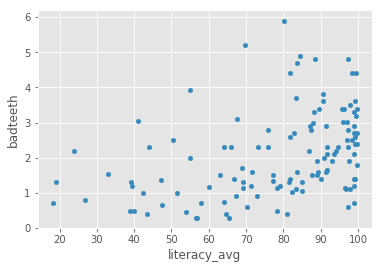

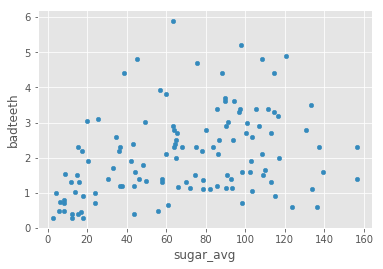

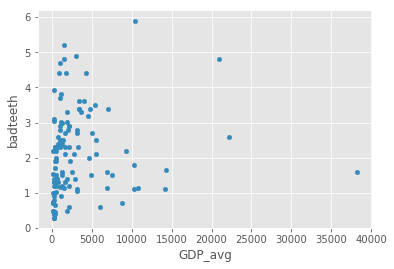

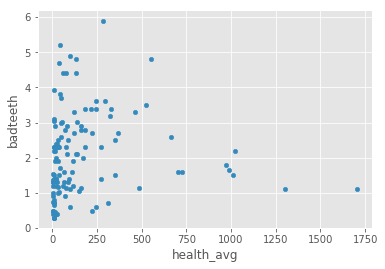

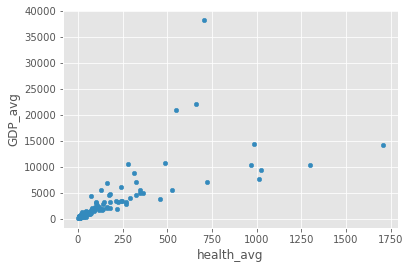

In [19]:
df.plot(kind = 'scatter', x = 'literacy_avg', y = 'badteeth')

df.plot(kind = 'scatter', x = 'sugar_avg', y = 'badteeth')

df.plot(kind = 'scatter', x = 'GDP_avg', y = 'badteeth')

df.plot(kind = 'scatter', x = 'health_avg', y = 'badteeth')

df.plot(kind = 'scatter', x = 'health_avg', y = 'GDP_avg')

In [21]:
df.corr()

,badteeth,literacy_avg,GDP_avg,sugar_avg,health_avg
badteeth,1.000000,0.386415,0.130030,0.341168,0.042692
literacy_avg,0.386415,1.000000,0.270349,0.594290,0.380230
GDP_avg,0.130030,0.270349,1.000000,0.381424,0.704342
sugar_avg,0.341168,0.594290,0.381424,1.000000,0.370900
health_avg,0.042692,0.380230,0.704342,0.370900,1.000000


In [23]:
df.describe()

,badteeth,literacy_avg,GDP_avg,sugar_avg,health_avg
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,2.078099,78.165821,3038.871018,69.238413,170.912344
std,1.217042,20.786888,4993.960158,39.086482,279.593892
min,0.300000,18.201399,139.937213,2.677727,2.155842
25%,1.180000,66.641822,447.218705,36.740682,16.922464
50%,1.900000,83.755499,1277.797569,70.110682,66.530291
75%,2.800000,96.273284,3240.432619,98.567727,180.832570
max,5.900000,99.763509,38226.277040,156.538636,1705.243078


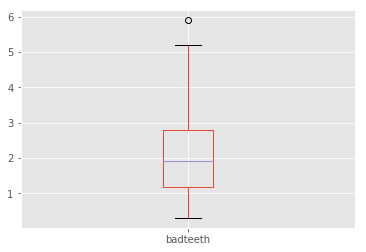

In [27]:
df[ ['badteeth'] ].boxplot(figsize = (8, 8))

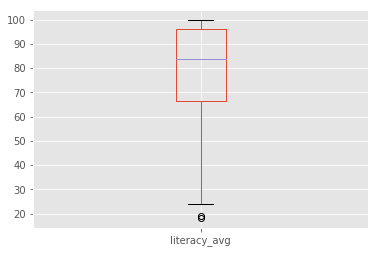

In [28]:
df[ ['literacy_avg'] ].boxplot(figsize = (8, 8))


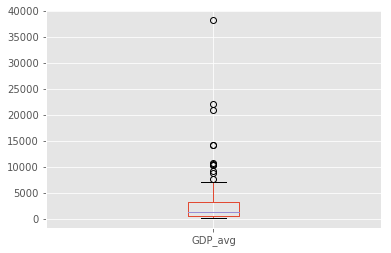

In [29]:
df[ ['GDP_avg'] ].boxplot(figsize = (8, 8))


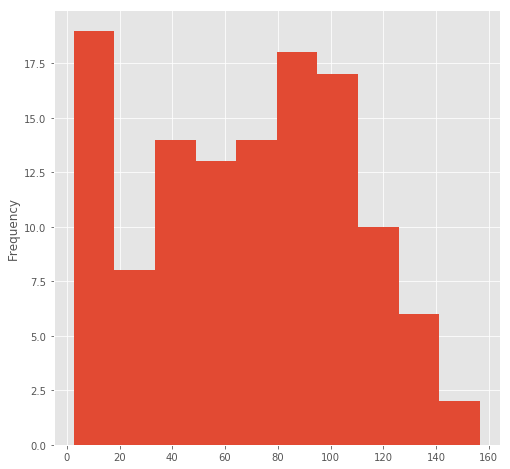

In [31]:
df.sugar_avg.plot(kind = 'hist', figsize = (8, 8))

### Exercises:
##### --Double click this cell to answer-- 

1)  Describe the features of the data set. Did you find anything unique to them?

Answer: 
The higher the badteeth number, the worse your teeth is.
Health average: spent on healthcare.


2)  Describe the correlations you found. 

Answer: Sugar average has high correlation with literacy average. 
GDP average has high correlation with health average.
Literacy average and sugar average has high correlation with bad teeth.


3)  Describe the distributions of the data. 

Answer: Nothing is anywhere near normally distributed.

4)  Describe any assumptions you are making. How will these affect your research?

Answer: 

1) In your own words, explain the difference between correlation and regression. Explain a few advantages and disadvantages to each. Compare results with your table: 

Answer:  

# Hypothesis
You've seen the data. What are the features and what is the output? Explain your hypotheses here: 

### H0: literacy_avg, GDP_avg, sugar_avg, health_avg will have significant predictive power.

### H1: literacy_avg GDP_avg sugar_avg	health_avg will not have significant predictive power.




# Build your models 

In [46]:
from sklearn import linear_model, preprocessing, neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import  train_test_split

In [54]:

columns_X = ['literacy_avg', 'GDP_avg', 'sugar_avg']
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)


#literacy_avg, GDP_avg, sugar_avg

In [55]:
X

array([[  7.58259259e-01,   2.70969124e-01,   3.95382193e-01],
       [  6.31692144e-01,   3.53779969e-02,   6.17963686e-01],
       [  8.10894103e-01,   7.70589266e-02,   7.66096297e-01],
       [  8.61156369e-01,   5.47481920e-01,   6.85958983e-01],
       [  9.70198789e-01,   3.80780308e-02,   2.75728328e-01],
       [  8.03732268e-01,   2.26655713e-02,   4.75097047e-01],
       [  7.78216851e-01,   1.08701007e-01,   2.32705749e-01],
       [  9.81786801e-01,   4.26473191e-02,   5.55637618e-01],
       [  9.97683561e-01,   2.16911483e-02,   7.26370107e-01],
       [  4.52421291e-01,   5.29433465e-03,   3.50874757e-01],
       [  8.88888030e-01,   2.72834345e-02,   3.71090773e-01],
       [  7.99001836e-01,   2.41680714e-02,   5.67371947e-01],
       [  9.93869884e-01,   1.02060530e-01,   5.94862720e-01],
       [  8.89014944e-01,   8.56569103e-02,   5.65753012e-01],
       [  9.77270490e-01,   1.40018681e-01,   8.46903547e-01],
       [  8.75541841e-01,   1.23155773e-01,   5.4106572

In [57]:
c = df.badteeth

model = neighbors.KNeighborsClassifier(n_neighbors = 1).\
    fit(X, c)

ValueError: Unknown label type: 'continuous'

# Spot Check 

How's the model building coming? Have you identifyed some features of interest and noticed any trends? If so, put them into words. 

### Noticeable Trends: 

1) 

2) 

3) 


# Optimization

Time to fine tune the model. What hyperparameters exist in your model? How do you tune these hyperparameters? Also, how can you test for overfitting, and how will you reduce it if you see it? Implement below. 

Evaluate your models again. How do different hyperparameters change your predictive performance? Again, explain in a few words.

In [ ]:
# TO DO:
# fill in the correct values for the hyperparameter testing. 

for INPUT HYPERPARAMTER in range(INPUT RANGE):
    model = 
    #TO DO: test hyperparameters 

# Final Conclusions

If a data scientist makes a brilliant conclusion but can't communicate effectively, did they ever make a conclusion?  

Explain your findings to a person with a math/stats background. Reference your H1/H0 hypotheses:

Answer: 

Now explain them to a person who hates math:

Answer: 
